# Trial

Essential libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [135]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



plotting Binding Energies against N, Y, A and against the Nuclear Chart.

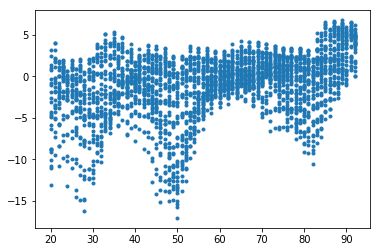

In [136]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

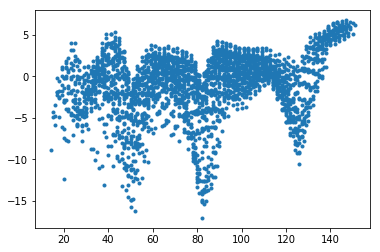

In [137]:
plt.plot(N,y,'o',markersize=3)
plt.show()

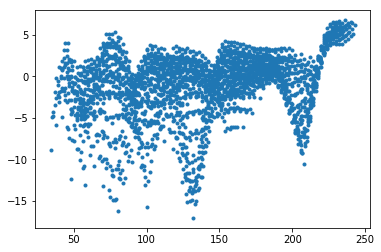

In [138]:
plt.plot(A,y,'o',markersize=3)
plt.show()

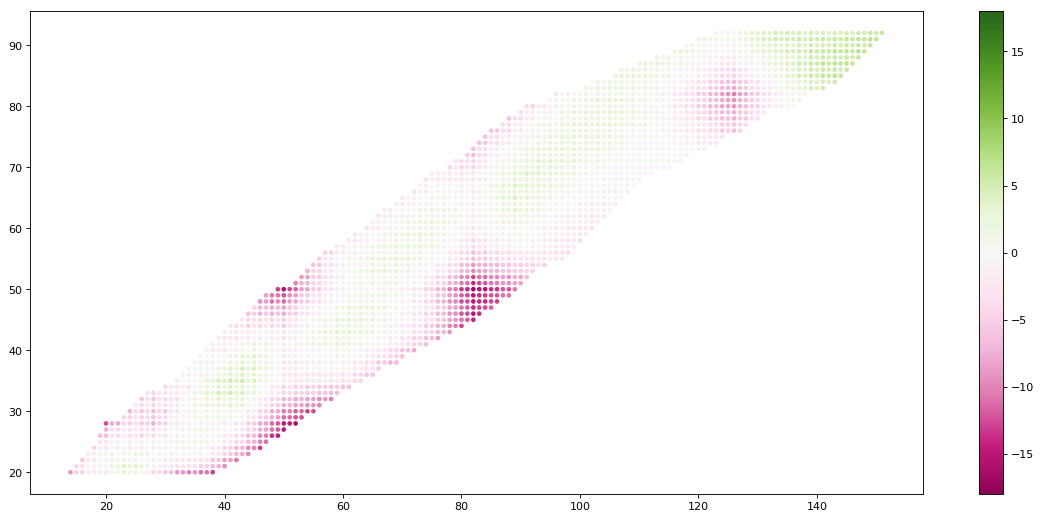

In [139]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2695, 2)
(2021, 2)
(674, 2)


In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features


Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score

In [144]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);

In [145]:

predictions=rf.predict(Xs_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
Etrain1=round(np.mean(errors), 5)



predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5), '\n\n\n' )
Etest1=round(np.mean(errors), 5)



Mean Absolute Error for train data: 0.22723
Mean Absolute Error for test data: 0.61166 





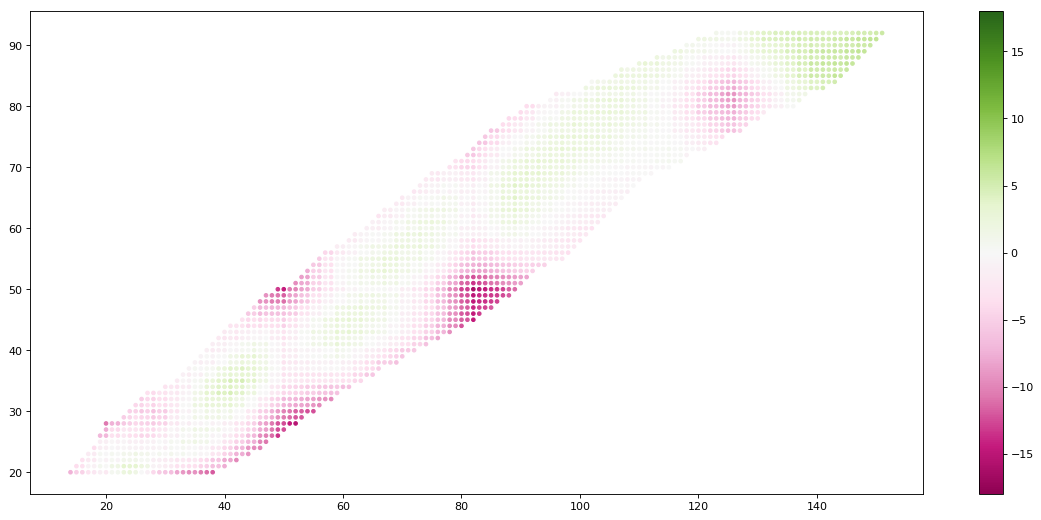

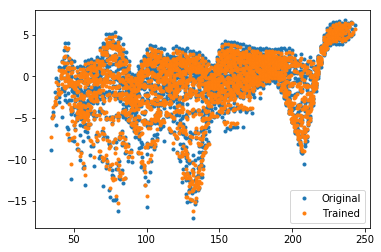

In [146]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers feature




In [147]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features


Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score



In [148]:
# Instantiate model 
#rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);

In [149]:


print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Mean Absolute Error for Xs_test data:', Etest1, "\n\n")


predictions=rf.predict(Xs_train)

errors = abs(predictions- y_train)

print('Mean Absolute Error for Xs_train data', round(np.mean(errors), 5), )
Etrain2=round(np.mean(errors),5)

predictions=rf.predict(Xs_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)


# Print out the mean absolute error (mae)
print('Mean Absolute Error for Xs_test data:', round(np.mean(errors), 5), '\n\n\n')
Etest2=round(np.mean(errors),5)

imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

print('Improvement of the train error:', imprtrain)
print('Improvement of the test error:', imprtest)

Mean Absolute Error for Xs_train data: 0.22723
Mean Absolute Error for Xs_test data: 0.61166 


Mean Absolute Error for Xs_train data 0.27052
Mean Absolute Error for Xs_test data: 0.75387 



Improvement of the train error: 0.043289999999999995
Improvement of the test error: 0.14221000000000006


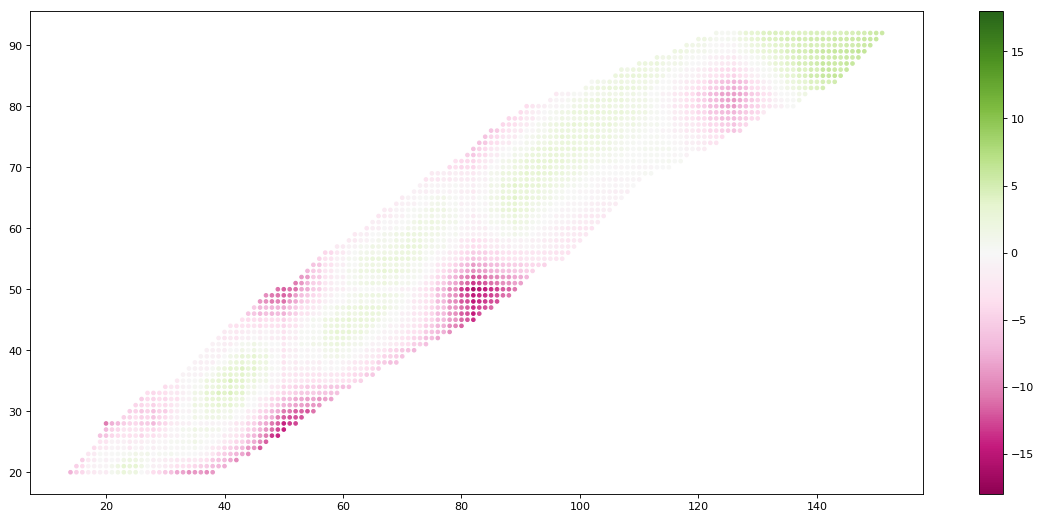

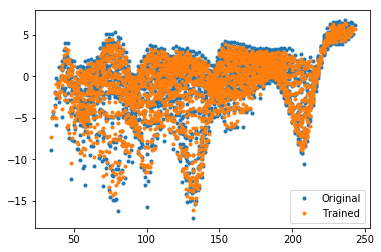

In [134]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()



In [150]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [154]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [155]:

predictions=rf_random.predict(Xs_train)

errors = abs(predictions- y_train)

print('Mean Absolute Error for Xs_train data', round(np.mean(errors), 5), )



predictions=rf_random.predict(Xs_test)

errors = abs(predictions - y_test)

print('Mean Absolute Error for Xs_test data:', round(np.mean(errors), 5), '\n\n\n')


Mean Absolute Error for Xs_train data 0.28355
Mean Absolute Error for Xs_test data: 0.7089 





In [153]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}